In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Github/questions.csv")

In [4]:
new_df = df.sample(30000)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
df.duplicated().sum()

0

0    255045
1    149306
Name: is_duplicate, dtype: int64


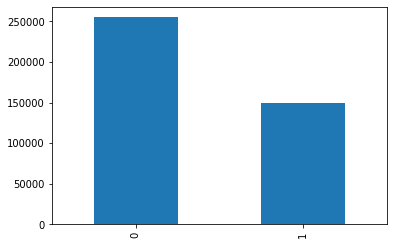

In [8]:
print(df['is_duplicate'].value_counts())
df['is_duplicate'].value_counts().plot(kind='bar')

In [9]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
197719,Will we ever win the war on terrorism?,Can the war on terror ever be won?
9319,How do I become an ethical hacker?,How can I be a ethical hacker?
54717,What would I do with only comptia a+ certifica...,Should I get my compTIA A+ certification?
106747,How can I lower my cholesterol?,How can I lower my cholesterol quickly?
100511,What was the significance of the battle of Som...,What was the significance of the battle of Som...


In [10]:
from sklearn.feature_extraction.text import CountVectorizer 

questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features = 3000)
q1_arr , q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2) 


In [11]:
temp_df1 = pd.DataFrame(q1_arr,index = ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index = ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [12]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [13]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
197719,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9319,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
54717,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7331666666666666

In [16]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.6695